In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset("flights")
df.head()

# Basic overview
print("Shape:", df.shape)
print("\nData Info:\n")
df.info()
print("\nDescription:\n", df.describe())


Shape: (144, 3)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB

Description:
               year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


In [2]:
# Missing and duplicates check
print("\nMissing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 year          0
month         0
passengers    0
dtype: int64
Duplicate rows: 0


In [3]:
# Convert datatypes
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype('category')

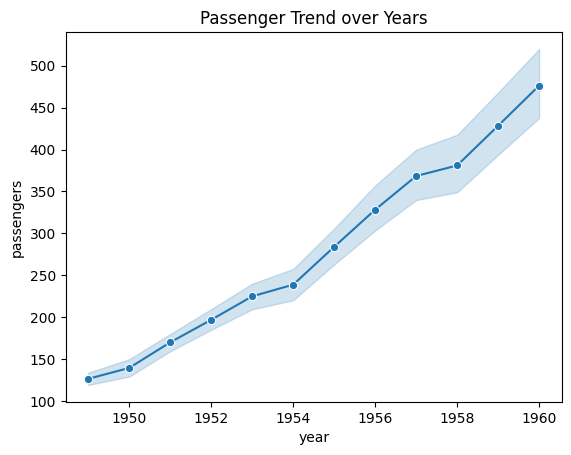

In [4]:
# === Univariate Analysis ===
# Lineplot of passengers over years
sns.lineplot(x='year', y='passengers', data=df, marker="o")
plt.title("Passenger Trend over Years")
plt.show()

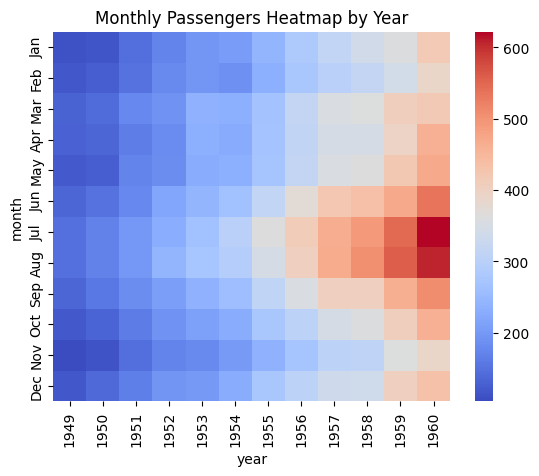

In [5]:
# === Bivariate Analysis ===
# Heatmap of monthly passengers across years
pivot = df.pivot(index='month', columns='year', values='passengers')
sns.heatmap(pivot, cmap='coolwarm')
plt.title("Monthly Passengers Heatmap by Year")
plt.show()

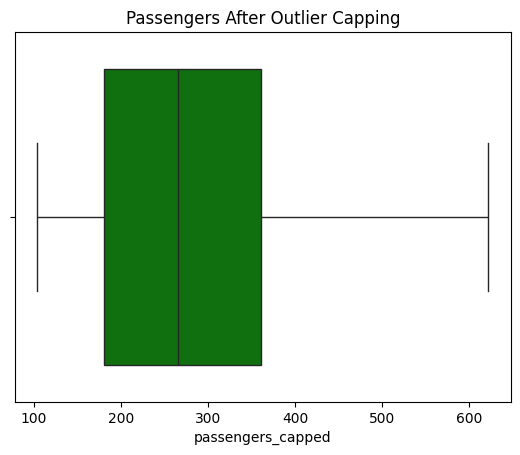

In [6]:
# === Outlier Detection ===
Q1 = df['passengers'].quantile(0.25)
Q3 = df['passengers'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df['passengers_capped'] = df['passengers'].clip(lower, upper)

sns.boxplot(x=df['passengers_capped'], color='green')
plt.title("Passengers After Outlier Capping")
plt.show()

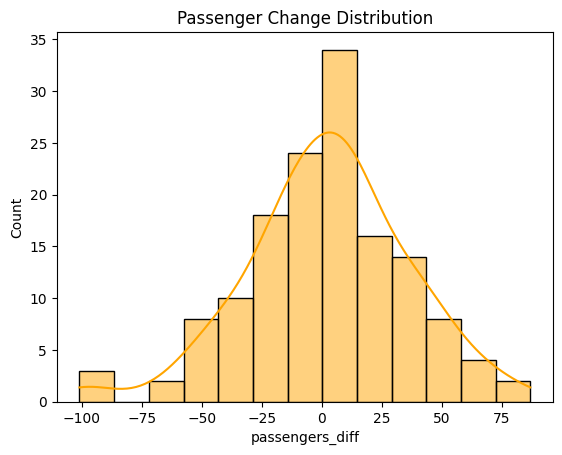

In [8]:
# === Feature Engineering ===
# Create new feature: monthly difference
df['passengers_diff'] = df['passengers'].diff()

# Visualize passenger difference
sns.histplot(df['passengers_diff'].dropna(), kde=True, color='orange')
plt.title("Passenger Change Distribution")
plt.show()

In [9]:
# Save cleaned dataset
df.to_csv("Flights_cleaned.csv", index=False)
print("\nCleaned Flights data saved as Flights_cleaned.csv")


Cleaned Flights data saved as Flights_cleaned.csv
